# Precision and recall

In [1]:
import numpy as np
from sklearn import datasets

In [5]:
digits = datasets.load_digits()
X = digits.data
y = digits.target.copy() # 要使用深拷贝  

y[digits.target == 9] = 1
y[digits.target != 9] = 0 # 变成极度偏斜的数据

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [7]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="liblinear")   # OvR
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

0.9755555555555555

In [8]:
y_log_predict = log_reg.predict(X_test)

In [9]:
def TN(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    
    return np.sum((y_true == 0) & (y_predict == 0))

TN(y_test, y_log_predict)

403

In [10]:
def FP(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    
    return np.sum((y_true == 0) & (y_predict == 1))

FP(y_test, y_log_predict)
    

2

In [11]:
def TP(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    
    return np.sum((y_true == 1) & (y_predict == 1))

TP(y_test, y_log_predict)

36

In [13]:
def FN(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    
    return np.sum((y_true == 1) & (y_predict == 0))

FN(y_test, y_log_predict)

9

In [16]:
def confusion_matrix(y_true, y_predict):
    return np.array([
        [TN(y_test, y_log_predict), FP(y_test, y_log_predict)],
        [FN(y_test, y_log_predict), TP(y_test, y_log_predict)]
    ])

confusion_matrix(y_test, y_log_predict)

array([[403,   2],
       [  9,  36]])

In [19]:
def precision_score(y_true, y_predict):
    try:
        return TP(y_true, y_predict) / (TP(y_true, y_predict) + FP(y_true, y_predict))
    except:
        return 0.0
    
precision_score(y_test, y_log_predict)

0.9473684210526315

In [22]:
def recall_score(y_true, y_predict):
    try:
        return TP(y_true, y_predict) / (TP(y_true, y_predict) + FN(y_true, y_predict))
    except:
        return 0.0

recall_score(y_test, y_log_predict)

0.8

# scikit-learn

In [23]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_log_predict)

array([[403,   2],
       [  9,  36]])

In [25]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_test, y_log_predict)  #threshold=0

0.9473684210526315

In [26]:
recall_score(y_test, y_log_predict)

0.8

# F1

In [28]:
def f1_score(precision, recall):
    try:
        return 2 * precision * recall / (precision + recall)
    except:
        return 0.0

In [29]:
f1_score(precision_score(y_test, y_log_predict), recall_score(y_test, y_log_predict))

0.8674698795180723

In [30]:
f1_score(0.1, 0.9)

0.18000000000000002

In [31]:
f1_score(0.9, 0.9)

0.9

In [34]:
f1_score(0, 0.9)

0.0

# scikit-learn中的f1_score

In [35]:
from sklearn.metrics import f1_score

In [36]:
f1_score(y_test, y_log_predict)

0.8674698795180723

# P R的平衡  threshold   decision_function

In [37]:
log_reg.decision_function(X_test)

array([-22.05699096, -33.02939331, -16.21333688, -80.37914686,
       -48.25125897, -24.54005571, -44.39169519, -25.04292453,
        -0.97829172, -19.71744304, -66.25139392, -51.09599906,
       -31.49347879, -46.0533646 , -38.67873948, -29.8047126 ,
       -37.58847914, -82.57568795, -37.81903334, -11.0116487 ,
        -9.17440207, -85.1300384 , -16.71617306, -46.23723003,
        -5.32991673, -47.91762972, -11.66729708, -39.19599958,
       -25.25293074, -14.36647194, -16.99783008, -28.91904096,
       -34.33939588, -29.47602444,  -7.85812494,  -3.82095286,
       -24.08159843, -22.16362887, -33.612166  , -23.14021388,
       -26.91803114, -62.38936203, -38.8568801 , -66.77258406,
       -20.14481689, -17.47886105, -18.06799437, -22.22224384,
       -29.62302884, -19.73172251,   1.49552231,   8.32079843,
       -36.29305424, -42.50731378, -25.9045985 , -34.98959353,
        -8.42009818, -50.04725799, -51.48207649,  19.88958038,
        -8.91887028, -31.9934215 , -11.66097373,  -0.47

In [38]:
log_reg.decision_function(X_test)[:10]

array([-22.05699096, -33.02939331, -16.21333688, -80.37914686,
       -48.25125897, -24.54005571, -44.39169519, -25.04292453,
        -0.97829172, -19.71744304])

In [39]:
log_reg.predict(X_test)[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [40]:
decision_scores = log_reg.decision_function(X_test)   # 决策边界的距离

In [59]:
X_test.shape

(450, 64)

In [58]:
decision_scores.shape

(450,)

In [41]:
np.mean(decision_scores)

-27.34920348385664

In [42]:
np.min(decision_scores)

-85.68607304951716

In [43]:
np.max(decision_scores)

19.889580375580753

In [44]:
y_predict2 = np.array(decision_scores >= 5, dtype="int") #threshold>0

In [45]:
y_predict2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [46]:
confusion_matrix(y_test, y_predict2)

array([[404,   1],
       [ 21,  24]])

In [47]:
precision_score(y_test, y_predict2)

0.96

In [48]:
recall_score(y_test, y_predict2)

0.5333333333333333

In [49]:
y_predict3 = np.array(decision_scores >= -5, dtype="int")  #threshold<0

In [50]:
confusion_matrix(y_test, y_predict3)

array([[390,  15],
       [  5,  40]])

In [53]:
precision_score(y_test, y_predict3)

0.7272727272727273

In [52]:
recall_score(y_test, y_predict3)

0.8888888888888888

# p-r curve

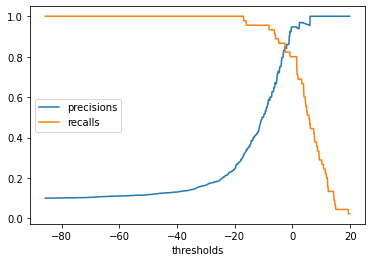

In [77]:
import matplotlib.pyplot as plt
precisions = []
recalls = []
thresholds = np.arange(np.min(decision_scores), np.max(decision_scores), 0.1)
for threshold in thresholds:
    y_predict = np.array(decision_scores >= threshold, dtype="int")
    precisions.append(precision_score(y_test, y_predict))
    recalls.append(recall_score(y_test, y_predict))
    
plt.plot(thresholds, precisions, label="precisions")
plt.plot(thresholds, recalls, label="recalls")
plt.legend()
plt.xlabel("thresholds")
plt.show()

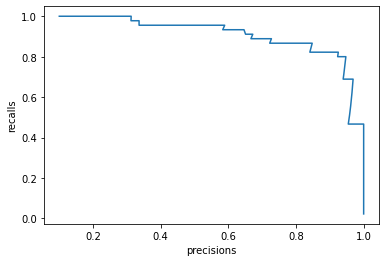

In [67]:
plt.plot(precisions, recalls)
plt.xlabel("precisions")
plt.ylabel("recalls")
plt.show()
# 开始急剧下降的点接近平衡点

# scikit-learn中的P-R曲线

In [79]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test, decision_scores)

In [80]:
precisions.shape

(145,)

In [81]:
recalls.shape

(145,)

In [82]:
thresholds.shape  # the last precision and recall values are 1 and 0. do not have a corresponding threshold

(144,)

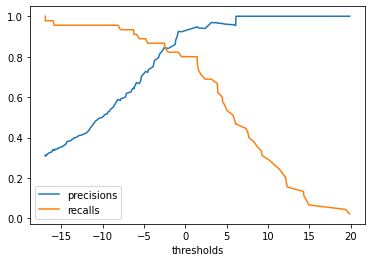

In [83]:
plt.plot(thresholds, precisions[:-1], label="precisions")
plt.plot(thresholds, recalls[:-1], label="recalls")
plt.xlabel("thresholds")
plt.legend()
plt.show()

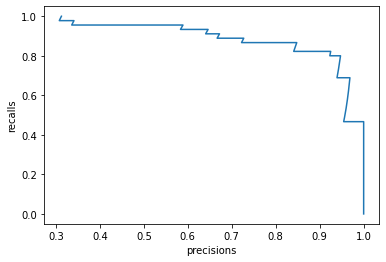

In [84]:
plt.plot(precisions, recalls)
plt.xlabel("precisions")
plt.ylabel("recalls")
plt.show()
# 开始急剧下降的点接近平衡点

# 可以比较不同模型的PR曲线，用面积来看，面积越大认为模型越好

# ====================================================

# ROC : receriver operation characteristic curve:用于比较两个模型孰优孰劣

In [85]:
from my_ml.metrics import FPR, TPR

In [86]:
fprs = []
tprs = []
thresholds = np.arange(np.min(decision_scores), np.max(decision_scores), 0.1)
for threshold in thresholds:
    y_predict = np.array(decision_scores >= threshold, dtype="int")
    fprs.append(FPR(y_test, y_predict))
    tprs.append(TPR(y_test, y_predict))
    

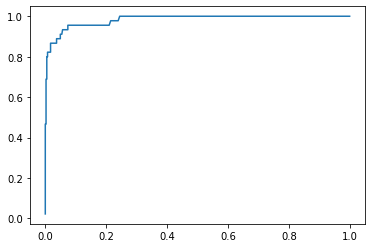

In [87]:
plt.plot(fprs, tprs)
plt.show()

# scikit-learn中的ROC

In [91]:
from sklearn.metrics import roc_curve

fprs, tprs, thresholds = roc_curve(y_test, decision_scores)

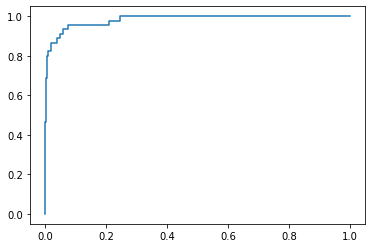

In [92]:
plt.plot(fprs, tprs)
plt.show()

In [93]:
# 求面积
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, decision_scores)

0.9830452674897119